In [1]:
%matplotlib inline


# Eigenvalues


Create an G{n,m} random graph and compute the eigenvalues.


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy.linalg
import numpy as np
import scipy.io as sio
import glob
import os

In [7]:
parpath = r"F:\Research\ScaleVariant\exp_20190803\scalefree"

In [2]:
def read_network(netfile):
    if '.mat' in netfile:
        # read network from matlab format file
        adjmat = sio.loadmat(netfile)['A']
        G = nx.from_numpy_matrix(adjmat)
    elif 'dk' in netfile:
        G = nx.read_edgelist(netfile, delimiter='\t', comments='#', data=(('weight', float),))
    else:
        G = nx.read_edgelist(netfile, delimiter=' ', comments='#', data=(('weight', float),))
    return G

In [3]:
def get_eigenvalues(netfile):
    G = read_network(netfile)
    L = nx.normalized_laplacian_matrix(G)
    e = numpy.linalg.eigvals(L.A)
    return (np.sort(e))

In [57]:
def get_eigenlist(folder):
    elist, filels = [], []
    mat_path = os.path.join(parpath, folder)
    for i in range(1, 6):
        for netfile in glob.glob(r'{}/*_index_{}.txt'.format(mat_path, i)):
            if os.path.isfile(netfile):
                filels.append(netfile)
                #print(netfile)
                e = get_eigenvalues(netfile)
                elist.append(e)
    print('Number of networks ', len(elist))
    return elist, filels

In [58]:
elist_BA, BA_ls = get_eigenlist('BA')

Number of networks  25


In [59]:
elist_cf, cf_ls = get_eigenlist('conf')

Number of networks  5


In [42]:
def save_egenvalues(elist, name='eigen'):
    earr = np.array(elist, dtype=np.float32).T
    np.savetxt(name, earr, delimiter='\t')
    print('Saved to file {}'.format(name), earr.shape)

In [43]:
save_egenvalues(elist_cf, 'eigen_CF.txt')

Saved to file eigen_CF.txt (128, 50)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [44]:
save_egenvalues(elist_BA, 'eigen_BA.txt')

Saved to file eigen_BA.txt (128, 50)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [9]:
def plot_eigenvalues(elist):
    fig, ax = plt.subplots(figsize=(5, 5))
    for e in elist:
        n = len(e)
        ax.scatter(range(n), e)
        ax.set_ylim(0, 0.5)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


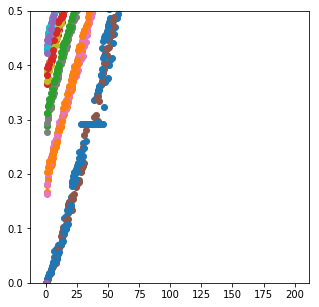

In [60]:
plot_eigenvalues(elist_BA)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:544: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


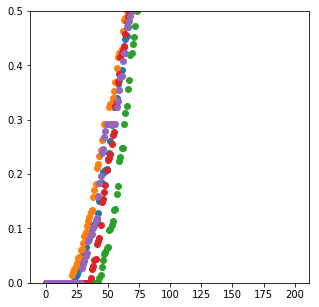

In [56]:
plot_eigenvalues(elist_cf)

Largest eigenvalue: 1.5979092784802063
Smallest eigenvalue: 8.427874383669795e-17


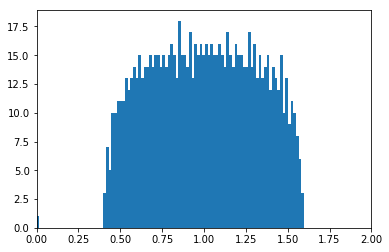

In [5]:
print("Largest eigenvalue:", max(e))
print("Smallest eigenvalue:", min(e))
plt.hist(e, bins=100)  # histogram with 100 bins
plt.xlim(0, 2)  # eigenvalues between 0 and 2
plt.show()

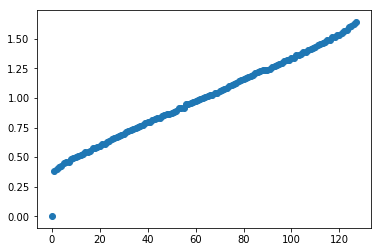

In [11]:
sorted_e = np.sort(e)
n = len(e)
plt.scatter(range(n), sorted_e)